# 📊 Diabetes Data Analysis and Prediction

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv('diabetes.csv')

# 1. Data Cleaning


In [7]:
# Check for missing values

In [8]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
# Check for zeros in features where zero doesn't make sense

In [12]:
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nNumber of zeros in relevant columns:")
for col in zero_columns:
    print(f"{col}: {len(df[df[col] == 0])}")



Number of zeros in relevant columns:
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [13]:
# Replace zeros with NaN and then with median

In [14]:
df_clean = df.copy()
df_clean[zero_columns] = df_clean[zero_columns].replace(0, np.nan).fillna(df_clean.median())

In [15]:
# Check for duplicates

In [16]:
print(f"\nNumber of duplicates: {df_clean.duplicated().sum()}")


Number of duplicates: 0


In [17]:
# # Check basic info

In [18]:
print("]nData info:")
df_clean.info()

]nData info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# 2. Exploratory Data Analysis and Visualization

In [30]:
# Set up the visualization style
sns.set(style="whitegrid")
plt.figure(figsize=(40, 10))

<Figure size 4000x1000 with 0 Axes>

<Figure size 4000x1000 with 0 Axes>

# 1. Outcome distribution

Text(0, 0.5, 'Count')

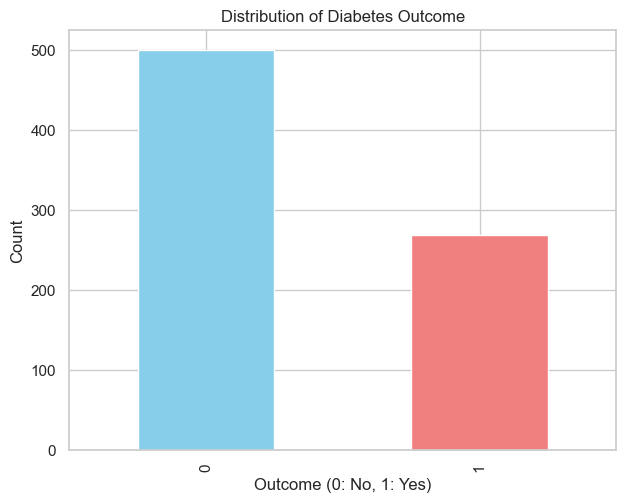

In [60]:
plt.figure(figsize=(24, 12))
plt.subplot(2, 3, 1)
df_clean['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No, 1: Yes)')
plt.ylabel('Count')

# # 2. Age distribution by outcome

Text(0.5, 1.0, 'Age Distribution by Outcome')

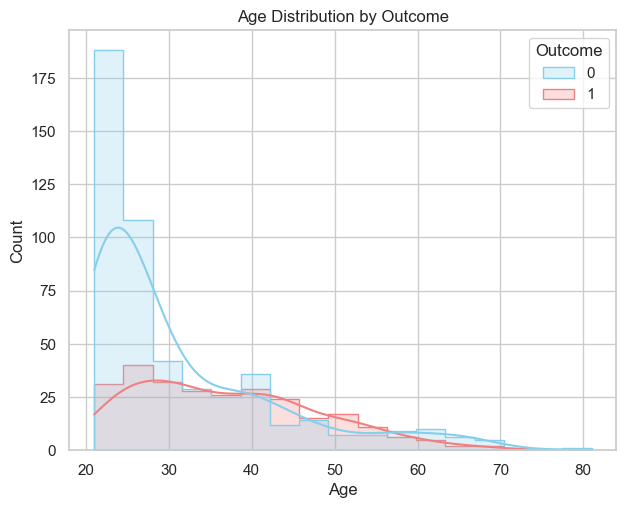

In [59]:
plt.figure(figsize=(24, 12))
plt.subplot(2, 3, 2)
sns.histplot(data=df_clean, x='Age', hue='Outcome', kde=True, element='step', palette=['skyblue', 'lightcoral'])
plt.title('Age Distribution by Outcome')

# 3. Glucose level by outcome

Text(0.5, 1.0, 'Glucose Level by Outcome')

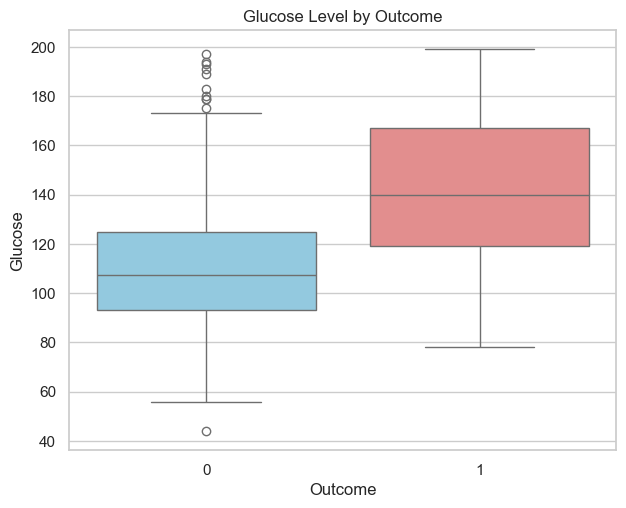

In [58]:
plt.figure(figsize=(24, 12))
plt.subplot(2, 3, 3)
sns.boxplot(x='Outcome', y='Glucose', data=df_clean, palette=['skyblue', 'lightcoral'])
plt.title('Glucose Level by Outcome')

# 4. BMI distribution by outcome

Text(0.5, 1.0, 'BMI by Outcome')

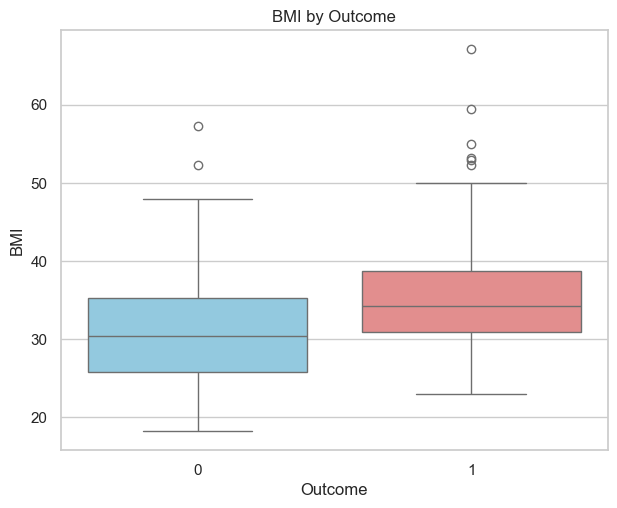

In [57]:
plt.figure(figsize=(24, 12))
plt.subplot(2, 3, 4)
sns.boxplot(x='Outcome', y='BMI', data=df_clean, palette=['skyblue', 'lightcoral'])
plt.title('BMI by Outcome')

 # 5. Correlation heatmap

Text(0.5, 1.0, 'Feature Correlation Heatmap')

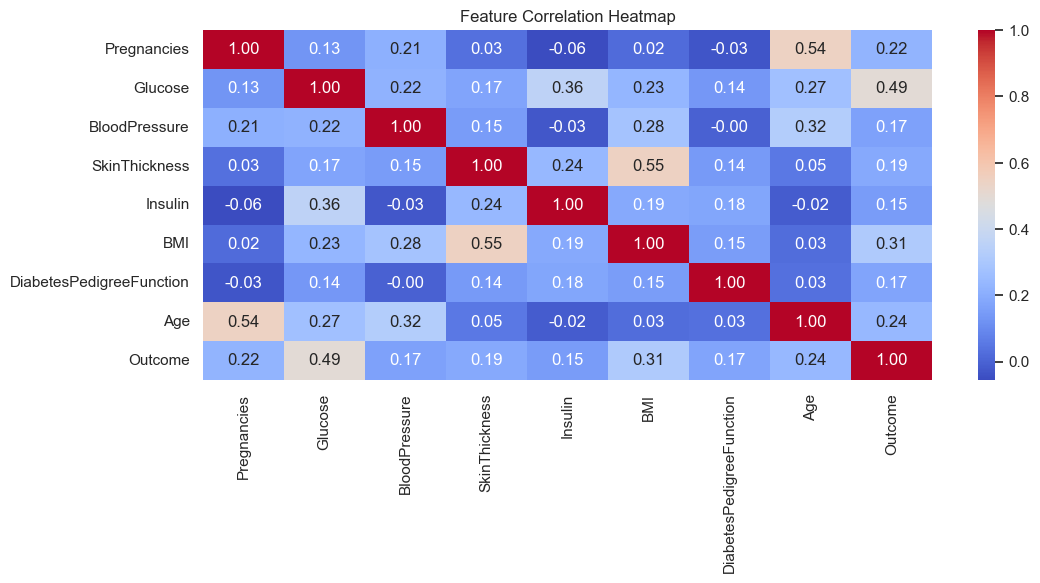

In [38]:
plt.figure(figsize=(40, 10))
plt.subplot(2, 3, 5)
corr = df_clean.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')

In [39]:
# # 6. Pairplot of selected features

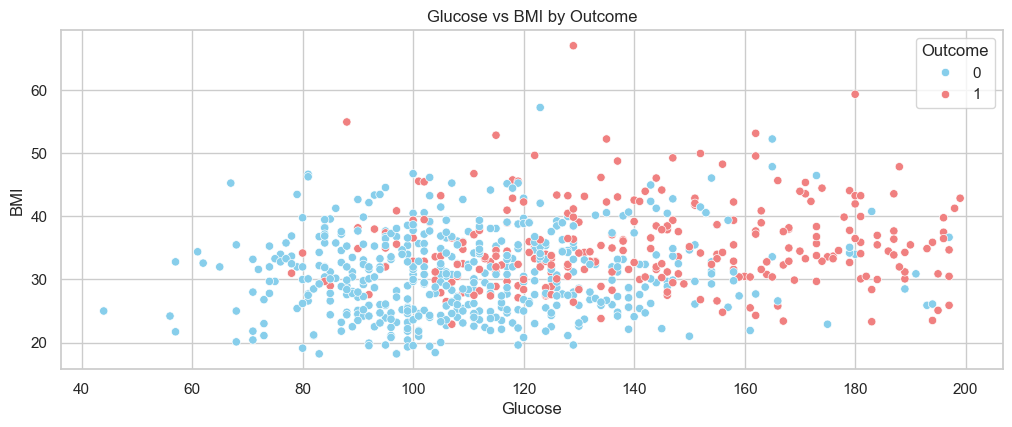

In [43]:
plt.figure(figsize=(30, 8))
plt.subplot(2, 3, 6)
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df_clean, palette=['skyblue', 'lightcoral'])
plt.title('Glucose vs BMI by Outcome')

plt.tight_layout()
plt.show()

In [44]:
 # 7. Pregnancies distribution

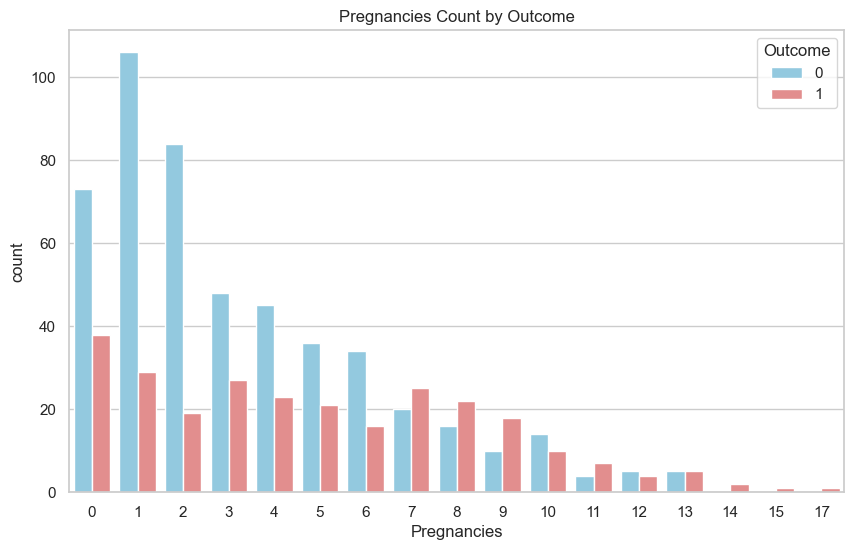

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pregnancies', hue='Outcome', data=df_clean, palette=['skyblue', 'lightcoral'])
plt.title('Pregnancies Count by Outcome')
plt.show()

In [46]:
# 8. Diabetes Pedigree Function distribution

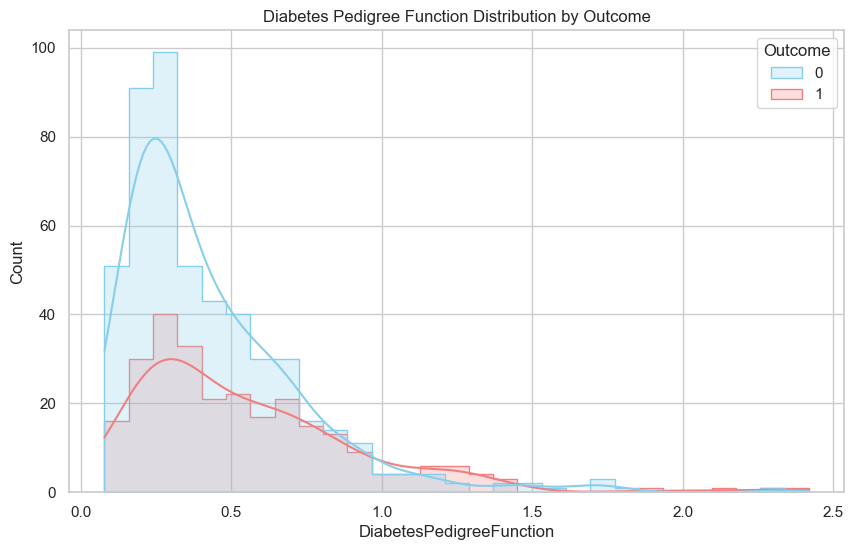

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='DiabetesPedigreeFunction', hue='Outcome', kde=True, element='step', palette=['skyblue', 'lightcoral'])
plt.title('Diabetes Pedigree Function Distribution by Outcome')
plt.show()

In [48]:
# # 9. Insulin level by outcome

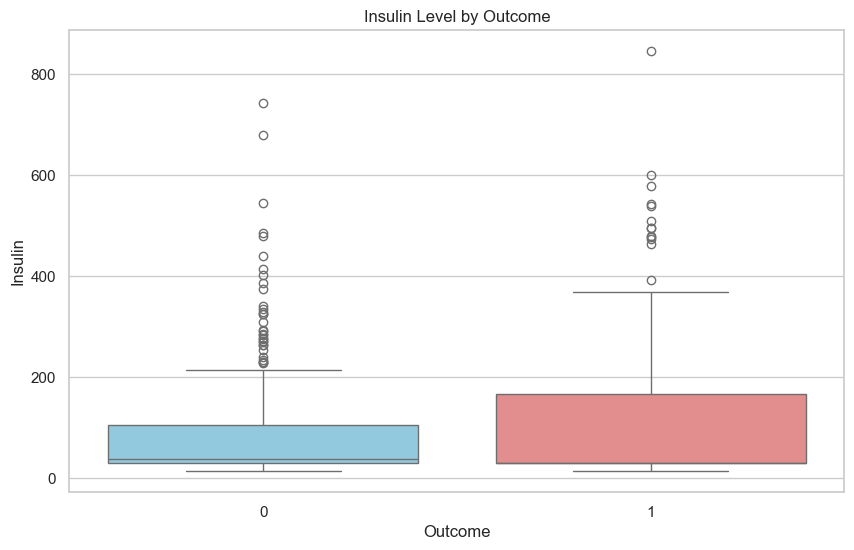

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Insulin', data=df_clean, palette=['skyblue', 'lightcoral'])
plt.title('Insulin Level by Outcome')
plt.show()

In [50]:
# 10. Blood Pressure distribution

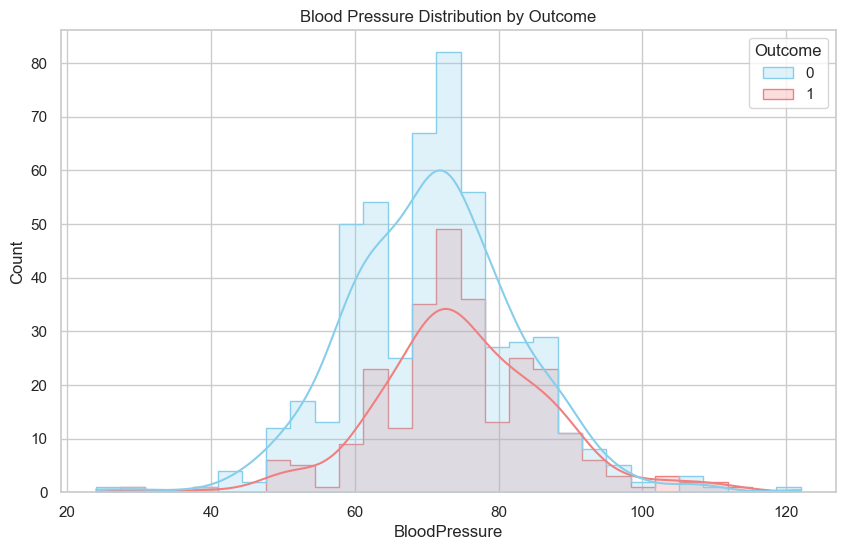

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='BloodPressure', hue='Outcome', kde=True, element='step', palette=['skyblue', 'lightcoral'])
plt.title('Blood Pressure Distribution by Outcome')
plt.show()

# 3. Data Preprocessing

In [61]:
# Split the data into features and target

In [62]:
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

In [63]:
# Split into training and testing sets

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
random_state=42, stratify=y)

In [67]:
# Standardize the features

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# 4. Model Building and Evaluation

In [69]:
# Initialize models

In [75]:
models = {
    'Logistic Regression' : LogisticRegression(random_state=42),
    'k-Nearest Neighbors' : KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(random_state=42, probability=True)
    
}

In [76]:
# Train and evaluate models

In [77]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    print(f"{name}: Accuracy = {accuracy:.4f}, CV Score = {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Logistic Regression: Accuracy = 0.7078, CV Score = 0.7802 (±0.0180)
k-Nearest Neighbors: Accuracy = 0.7078, CV Score = 0.7460 (±0.0304)
Decision Tree: Accuracy = 0.6688, CV Score = 0.6743 (±0.0313)
Random Forest: Accuracy = 0.7597, CV Score = 0.7639 (±0.0293)
Gradient Boosting: Accuracy = 0.7597, CV Score = 0.7541 (±0.0407)
XGBoost: Accuracy = 0.7338, CV Score = 0.7297 (±0.0343)
SVM: Accuracy = 0.7338, CV Score = 0.7622 (±0.0192)


In [78]:
# Train and evaluate models

In [79]:
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\nBest Model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")


Best Model: Random Forest with accuracy 0.7597


In [80]:
# Detailed evaluation of the best model

In [84]:
y_pred_best = best_model.predict(X_test_scaled)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best))


Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



#  Confusion Matrix

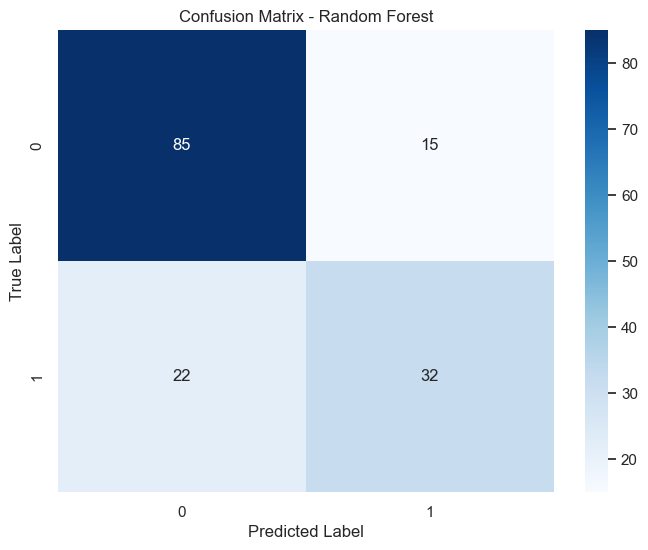

In [96]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve

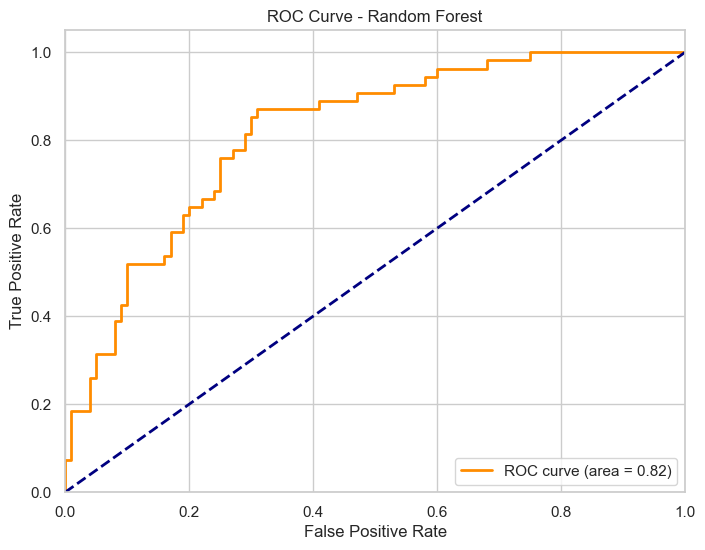

In [97]:
plt.figure(figsize=(8, 6))
if hasattr(best_model, "predict_proba"):
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
else:  # for SVM
    y_prob = best_model.decision_function(X_test_scaled)
    y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())
    
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend(loc="lower right")
plt.show()

In [98]:
# Feature Importance (if available)

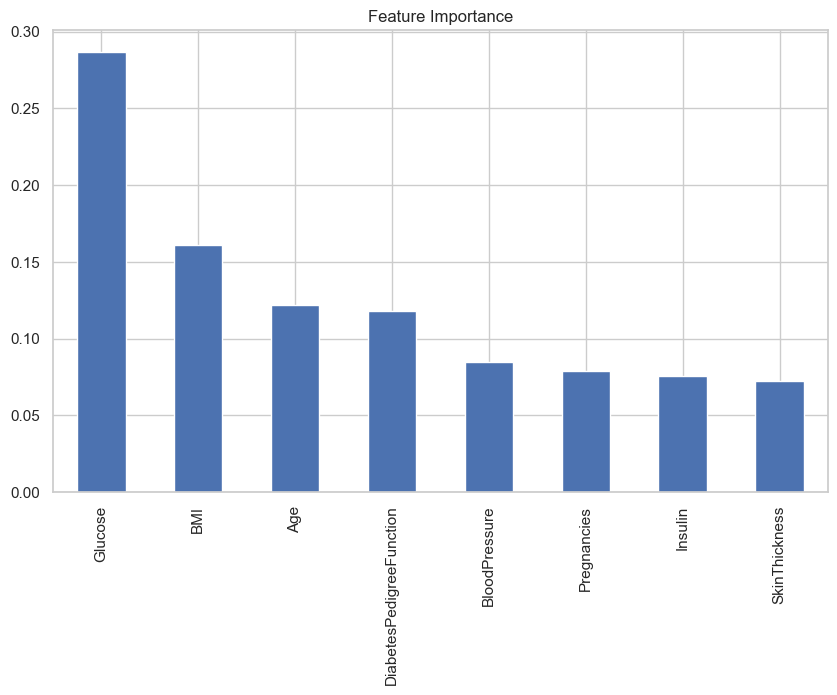

In [99]:
if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importance.sort_values(ascending=False, inplace=True)
    feature_importance.plot(kind='bar')
    plt.title('Feature Importance')
    plt.show()

# 5. Hyperparameter Tuning for Best Model

In [100]:
# Hyperparameter tuning for the best model

In [104]:
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
        
    }

    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [105]:
 # Evaluate tuned model

In [106]:
y_pred_tuned = best_model.predict(X_test_scaled)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned {best_model_name} Accuracy: {accuracy_tuned:.4f}")

Tuned Random Forest Accuracy: 0.7273


In [107]:
# Final prediction function

In [108]:
def predict_diabetes(model, scaler, pregnancies, glucose, bp, skinthickness, insulin, bmi, dpf, age):
    input_data = np.array([[pregnancies, glucose, bp, skinthickness, insulin, bmi, dpf, age]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    probability = model.predict_proba(input_scaled)[0][1] if hasattr(model, "predict_proba") else 0.5
    
    print(f"Prediction: {'Diabetic' if prediction[0] == 1 else 'Not Diabetic'}")
    print(f"Probability of being diabetic: {probability:.2f}")
    return prediction[0], probability

# Example prediction
print("\nExample Prediction:")
predict_diabetes(best_model, scaler, 2, 120, 70, 25, 80, 25.5, 0.3, 30)


Example Prediction:
Prediction: Not Diabetic
Probability of being diabetic: 0.07


(np.int64(0), np.float64(0.06689770875829515))